In [66]:
import pandas as pd
import numpy as np
import altair as alt

In [67]:
# enable correct rendering
alt.renderers.enable('default')

RendererRegistry.enable('default')

In [68]:
# uses intermediate json files to speed things up
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [69]:
# read all the tables
all_tests_df = pd.read_csv('assets/nextBechdel_allTests.csv')
cast_gender = pd.read_csv('assets/nextBechdel_castGender.csv')
top_2016 = pd.read_csv('assets/top_2016.csv')

In [70]:
# set up the tables for use
actors_movies = top_2016.set_index('Movie').join(cast_gender.set_index('MOVIE')).join(all_tests_df.set_index('movie')).reset_index().dropna()
movies_order = top_2016.sort_values(by=['Rank'])['Movie'].tolist()

In [71]:
base = alt.Chart(actors_movies).transform_filter(
    (alt.datum.TYPE != 'Unknown') & (alt.datum.GENDER != 'Unknown') & (alt.datum.GENDER != 'null')
)

In [72]:
encoding = base.transform_filter(
    alt.datum.GENDER == 'Female'
).encode(
    y= alt.Y(
        'index:N',
        sort= movies_order
    ),
    x=alt.X('count(index):Q',
            title='cast count'),
)

def m_bar():
    return encoding.mark_bar().properties(title='Female')

bar = m_bar()

In [73]:
bar

alt.Chart(...)

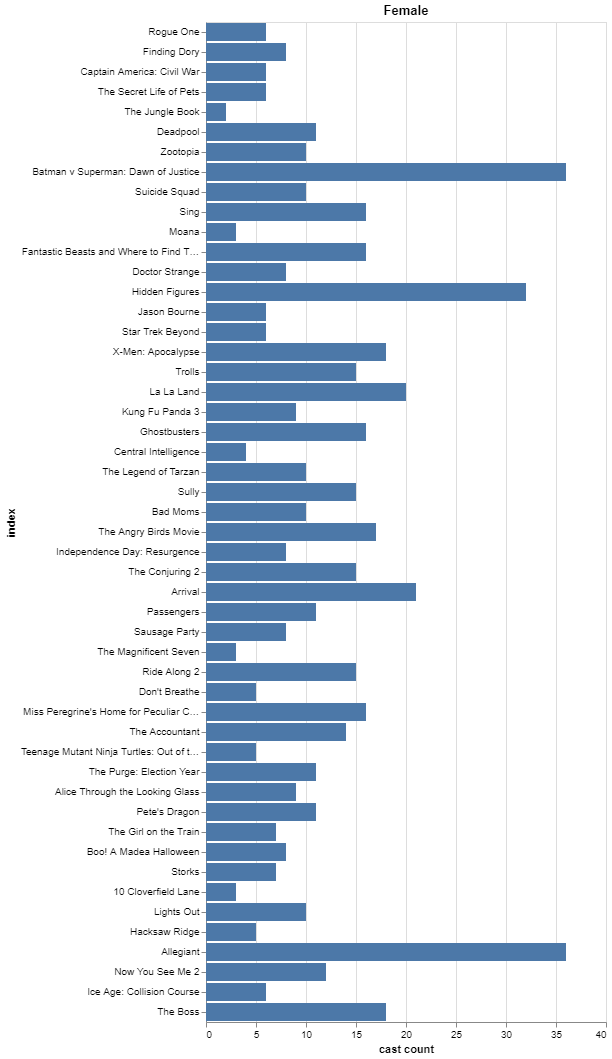

In [74]:
def m_circle():
    """
    return the call to altair function that uses the circle mark for the variables encoded in the previous example 
    """
    # return encoding. (...)
    return encoding.mark_circle().properties(title='Female')    

In [75]:
circle = m_circle()
circle

alt.Chart(...)

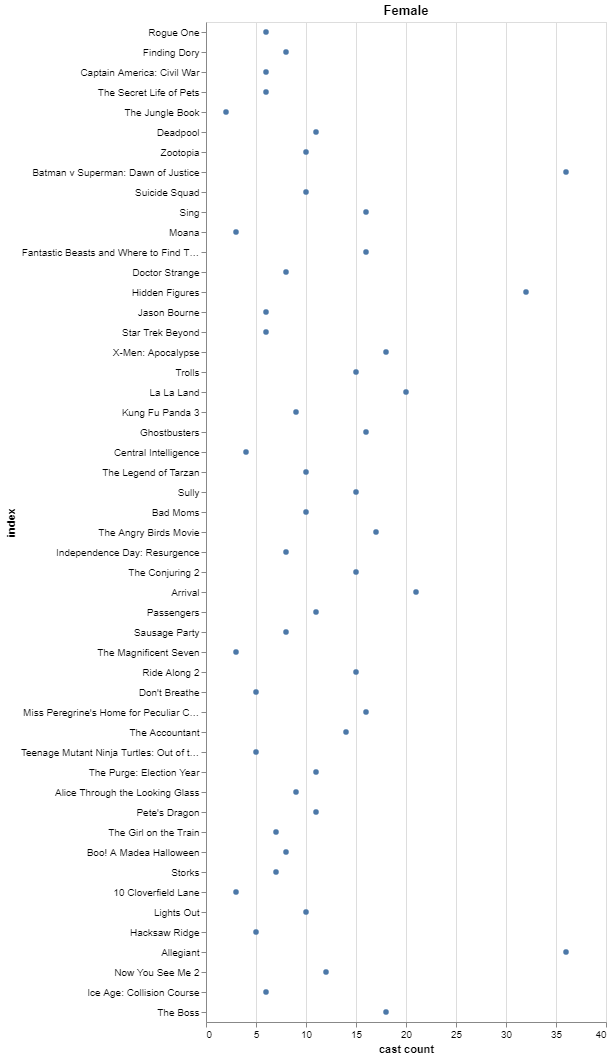

In [76]:
def female_actors():
    """
    return the call to Altair function that uses the bar mark for the variables and the color for the TYPE 
    """
    encoding = base.encode(
        y= alt.Y(
            'index:N',
            sort= movies_order,
            axis=None
        ),
        x=alt.X('count(index):Q',
                title='cast count'),
        # add color encoding
        color='TYPE', order=alt.Order('TYPE', sort='descending'))
        
    return encoding.mark_bar().properties(title='Female')

In [77]:
female = female_actors()
female

alt.Chart(...)

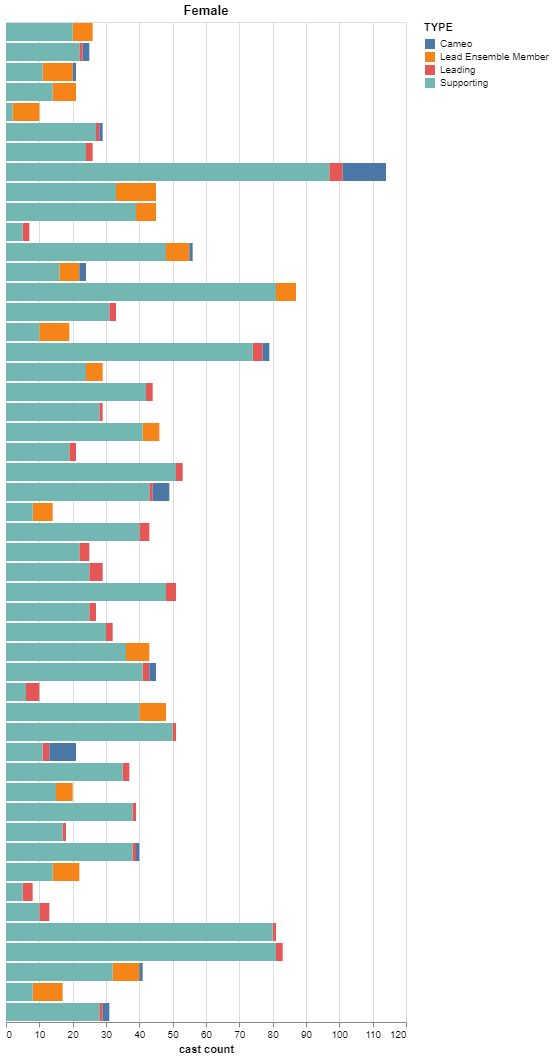

In [78]:
def male_actors():
    """
    returns an altair-defined chart that uses the bar mark for the variables and the color for the TYPE 
    this function filters the actors to be male
    """
    #add filter transform

    encoding = base.transform_filter(
        alt.datum.GENDER == 'Male'
        ).encode(
            y= alt.Y(
            'index:N',
            sort= movies_order
        ),
        x=alt.X('count(index):Q',
                sort='descending',
                title='cast count'),
         # add color encoding
        color='TYPE', order=alt.Order('TYPE',sort='descending')          
    ).mark_bar().properties(title='Male')
    
    return encoding.mark_bar().properties(title='Male')

In [79]:
male = male_actors()
male

alt.Chart(...)

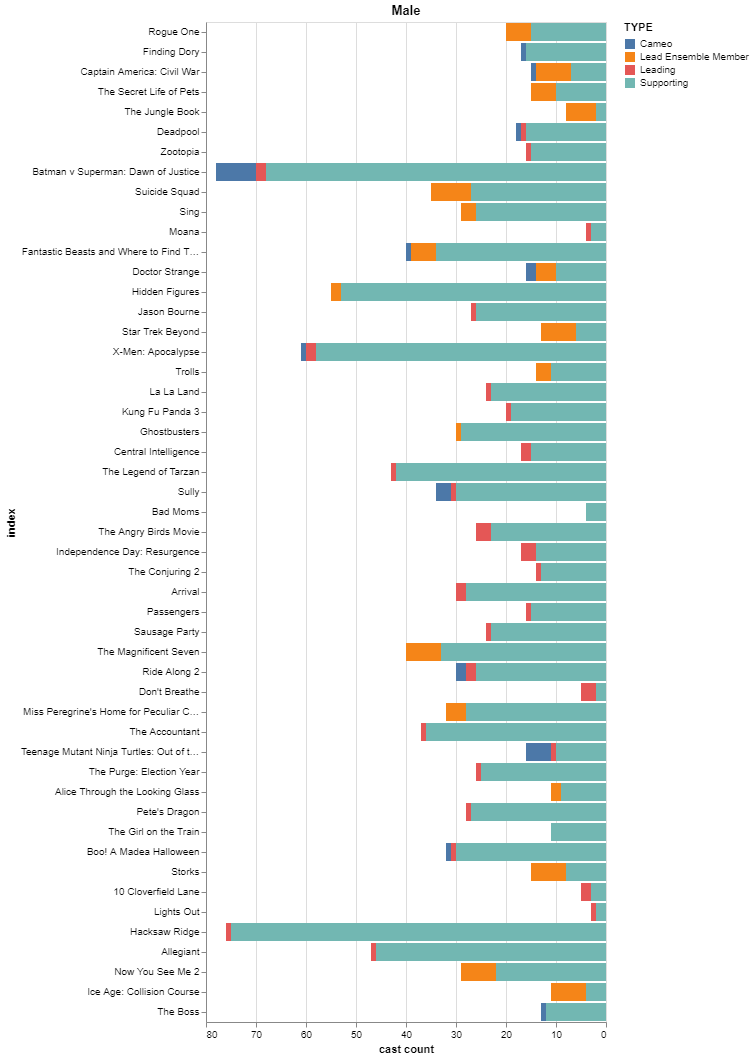

In [80]:
middle = base.encode(
    y=alt.Y('Rank:O', axis=None),
    text=alt.Text('Rank:Q'),
    color=alt.Color('bechdel:N')
).mark_text().properties(width=20)

# merge together the three charts, male, middle, female
male | middle | female

alt.HConcatChart(...)

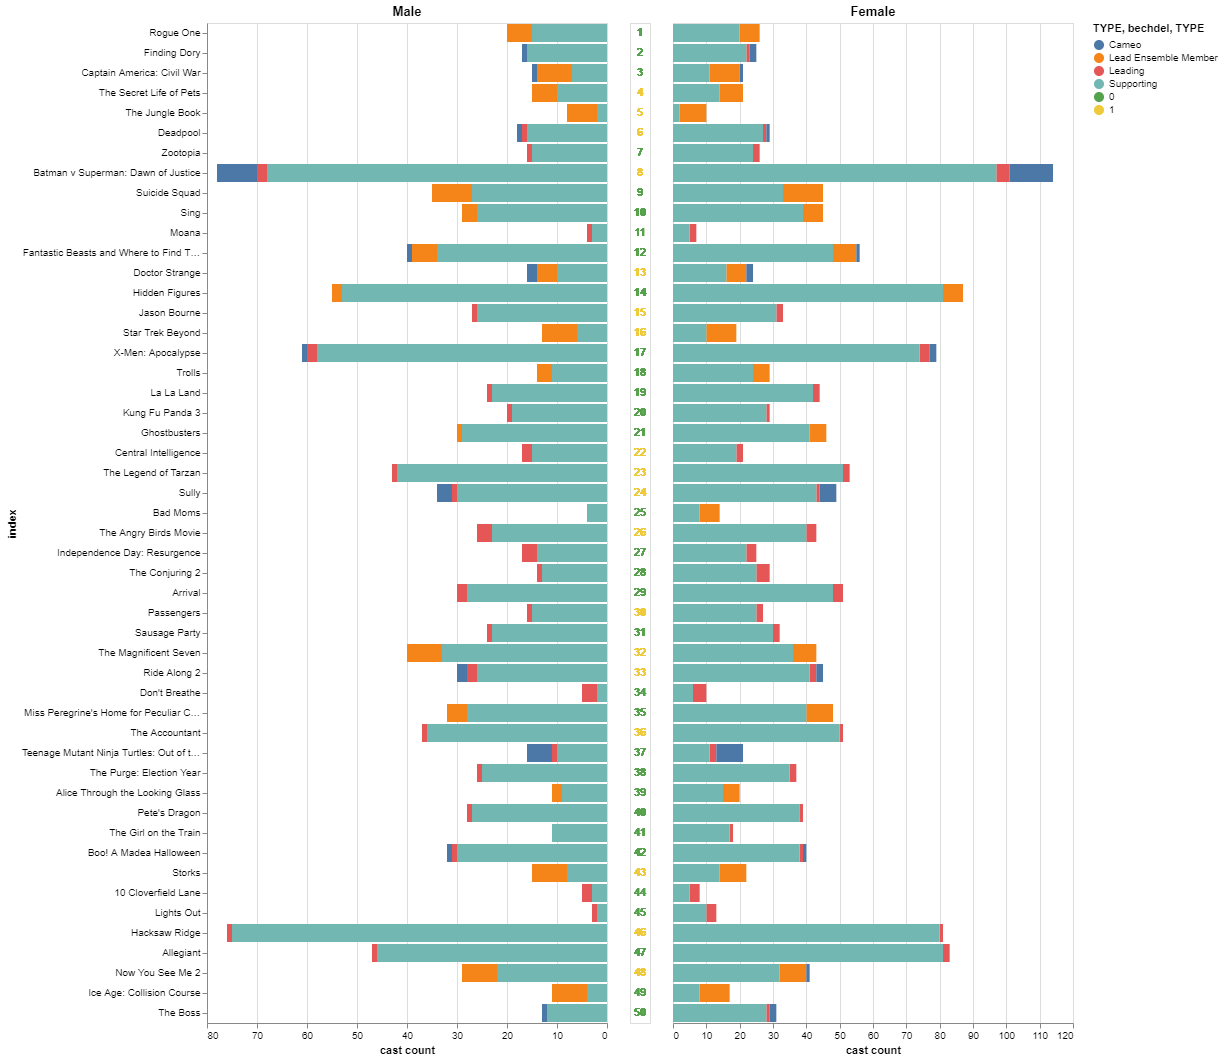

In [81]:
def alternative_encoding_one():
    """
    returns call to altair function for the new visualization
    """
    plot = base.mark_circle(
       opacity=0.8,
       stroke='black',
       strokeWidth=1
    ).encode(
        alt.X('TYPE:O'),
        alt.Y('index:N',
              sort= movies_order),
        size=alt.Size('count(index):Q',
        scale=alt.Scale(range=[0,4500]),
        legend=alt.Legend(title='Count of actors', symbolFillColor='white')),
        color=alt.Color('GENDER')
        
    ).properties(
        width=350,
        height=880
    )
    return plot

In [82]:
al_enc_one = alternative_encoding_one()
middle | al_enc_one

alt.HConcatChart(...)

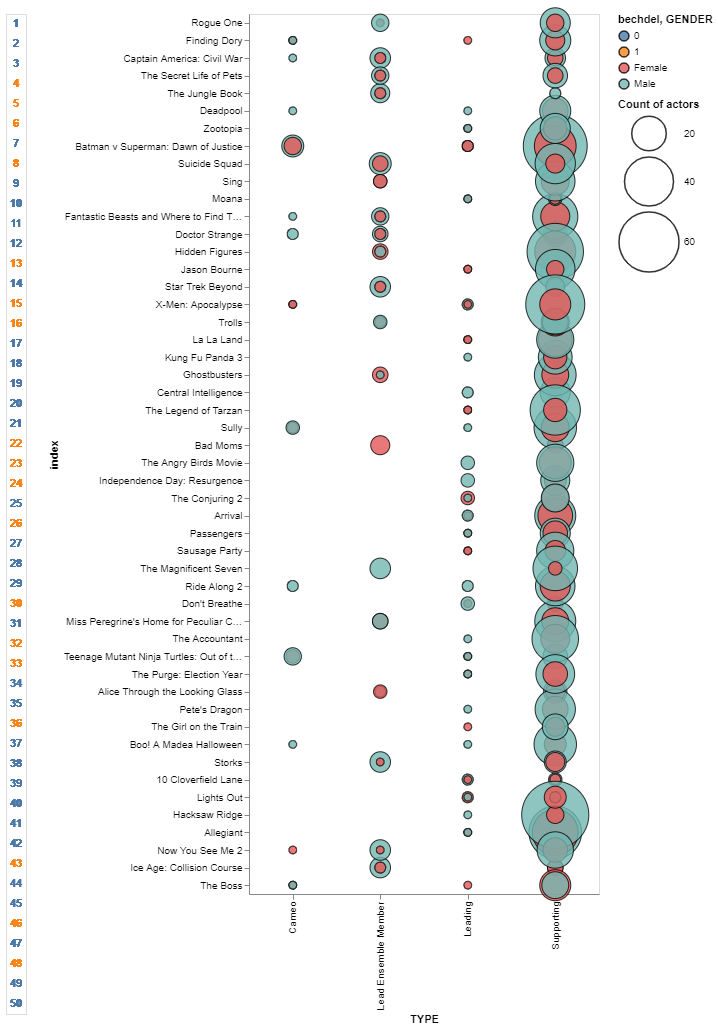

In [83]:
def female_actors_1():
    """
    returns call to altair function for the new visualization
    """
    # add filter transform
    plot = base.mark_rect().transform_filter(
    alt.datum.GENDER == 'Male').encode(
        alt.X('TYPE:N'),
        alt.Y('index:N',
              sort= movies_order),
        # add text and color
        color=alt.Color('bechdel:N')
    )
    # add filter transform
    text = base.transform_filter(
        alt.datum.GENDER == 'Female').mark_text(align='center',baseline='middle').encode(
        x='TYPE:O',
        y= alt.Y(
            'index:O',
            sort= movies_order,
             axis=None
        ),
        text='count(index)'
    )
    return plot + text

In [84]:
f_a_1 = female_actors_1()
f_a_1

alt.LayerChart(...)

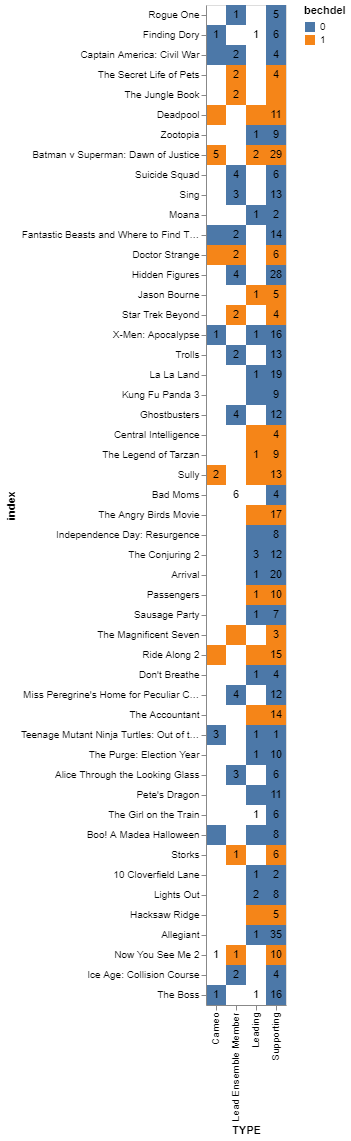

In [85]:
def male_actors_1():
    """
    return call to altair function for the new visualization
    """
    # add filter transform
    plot = base.mark_rect().transform_filter(
    alt.datum.GENDER == 'Male').encode(
        alt.X('TYPE:N', title = 'TYPE'),
        alt.Y('index:N',
              sort= movies_order,
              axis = None
             ),
        color=alt.Color('bechdel:N')
        
    )
    # add filter transform
    text = base.transform_filter(
        alt.datum.GENDER == 'Male').mark_text(align='center',baseline='middle').encode(
        x='TYPE:O',
        y= alt.Y('index:O',
            sort= movies_order,
            axis = None
        ),
        text='count(index)'
        
    )
    return plot + text

In [86]:
m_a_1 = male_actors_1()
m_a_1

alt.LayerChart(...)

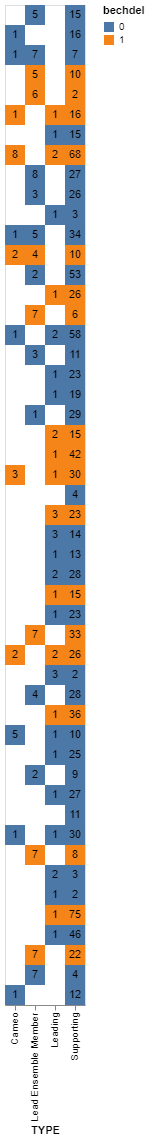

In [87]:
# create the visualization
f_a_1 | middle | m_a_1

alt.HConcatChart(...)

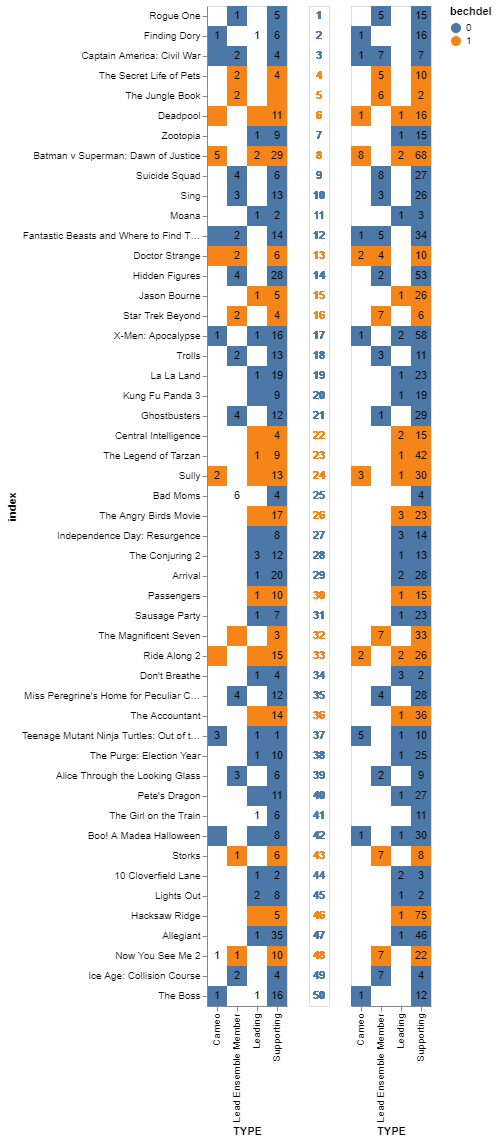